In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import pylab as pl
pl.style.use('fivethirtyeight')
from stackedBarGraph import StackedBarGrapher
SBG = StackedBarGrapher()

In [4]:
# Details from assignment pdf:
# Opening 2017
# 2.3 people/1000 sf
# 460k sf
# no onstreet parking
# 9am-9pm hours

# Source of building contents:
# https://www.nyu.edu/content/dam/nyu/govCommunAffairs/documents/nyu-in-nyc/brooklyn/2014-07-29-370-Jay-St-Presentation-Downloadable.pdf
# 450k sf above ground space
# 3 floors for CUSP (150k sf) (office)
# 27k sf retail on first floor
# 40k sf incubator (office)
# 233k sf left for NYU (mixed classroom office? - 50/50?)
# Do we consider cusp as new since it's moving and vacating another location?

total = 450
retail = 27
office_min = 190
office_max = 383
school_min = 40
school_max = 233

#Using http://www.nyc.gov/html/oec/downloads/pdf/2014_ceqr_tm/16_Transportation_2014.pdf for trip generation rates

times = ['am', 'mid', 'pm']
modes = ['subway', 'bus', 'walk', 'auto', 'taxi', 'rail', 'other']

trips = {
    'office': {
        'trips': 18,
        'am': {
            'trips': .12,
            'auto': .06,
            'subway': .479,
            'bus': .146,
            'walk': .084,
            'taxi': .03,
            'rail': .19,
            'other': .011
        },
        'mid': {
            'trips': .15,
            'auto': .02,
            'subway': .06,
            'bus': .06,
            'walk': .83,
            'taxi': .03,
            'rail': 0,
            'other': 0
        },
        'pm': {
            'trips': .14,
            'auto': .06,
            'subway': .479,
            'bus': .146,
            'walk': .084,
            'taxi': .03,
            'rail': .19,
            'other': .011
        }
    },
    'uni': {
        'trips': 26.6,
        'am': {
            'trips': .16,
            'auto': .06,
            'subway': .479,
            'bus': .146,
            'walk': .084,
            'taxi': .03,
            'rail': .19,
            'other': .011
        },
        'mid': {
            'trips': .15,
            'auto': .02,
            'subway': .06,
            'bus': .06,
            'walk': .83,
            'taxi': .03,
            'rail': 0,
            'other': 0
        },
        'pm': {
            'trips': .26,
            'auto': .06,
            'subway': .479,
            'bus': .146,
            'walk': .084,
            'taxi': .03,
            'rail': .19,
            'other': .011
        }
    },
    'local': {
        'trips': 205,
        'am': {
            'trips': .03,
            'auto': .02,
            'subway': .06,
            'bus': .06,
            'walk': .83,
            'taxi': .03,
            'rail': 0,
            'other': 0
        },
        'mid': {
            'trips': .19,
            'auto': .02,
            'subway': .06,
            'bus': .06,
            'walk': .83,
            'taxi': .03,
            'rail': 0,
            'other': 0
        },
        'pm': {
            'trips': .10,
            'auto': .02,
            'subway': .06,
            'bus': .06,
            'walk': .83,
            'taxi': .03,
            'rail': 0,
            'other': 0
        }
    },
    'dest': {
        'trips': 78.2,
        'am': {
            'trips': .03,
            'auto': .09,
            'subway': .265,
            'bus': .08,
            'walk': .505,
            'taxi': .04,
            'rail': .02,
            'other': 0
        },
        'mid': {
            'trips': .09,
            'auto': .09,
            'subway': .2,
            'bus': .08,
            'walk': .59,
            'taxi': .04,
            'rail': 0,
            'other': 0
        },
        'pm': {
            'trips': .09,
            'auto': .09,
            'subway': .265,
            'bus': .08,
            'walk': .505,
            'taxi': .04,
            'rail': .02,
            'other': 0
        }
    }
}

In [5]:
generated = []
gen_am = []

results = {}

office = np.arange(office_min, office_max+1)
school = total - retail - office
local_retail_percent = np.arange(0,1.01,.01)
dest_retail_percent = 1 - local_retail_percent

for i in range(101):
    retailg = local_retail_percent[i]*retail*trips['local']['trips'] + dest_retail_percent[i]*retail*trips['dest']['trips']
    generated.append(office*trips['office']['trips'] + school*trips['uni']['trips'] + retailg)
    
    '''
    am =    local_retail_percent[i]*retail*trips['local']['trips']*trips['local']['am']['trips'] + \
            dest_retail_percent[i]*retail*trips['dest']['trips']*trips['dest']['am']['trips'] + \
            office*trips['office']['trips']*trips['office']['am']['trips'] + \
            school*trips['uni']['trips']*trips['uni']['am']['trips']
    '''
    
    for time in times:
        results[time] = {}
        for mode in modes:
            r = local_retail_percent[i]*retail*trips['local']['trips']*trips['local'][time]['trips']*trips['local'][time][mode] + \
            dest_retail_percent[i]*retail*trips['dest']['trips']*trips['dest'][time]['trips']*trips['dest'][time][mode] + \
            office*trips['office']['trips']*trips['office'][time]['trips']*trips['office'][time][mode] + \
            school*trips['uni']['trips']*trips['uni'][time]['trips']*trips['uni'][time][mode]
            
            results[time][mode] = r
    #gen_am.append(am)
    


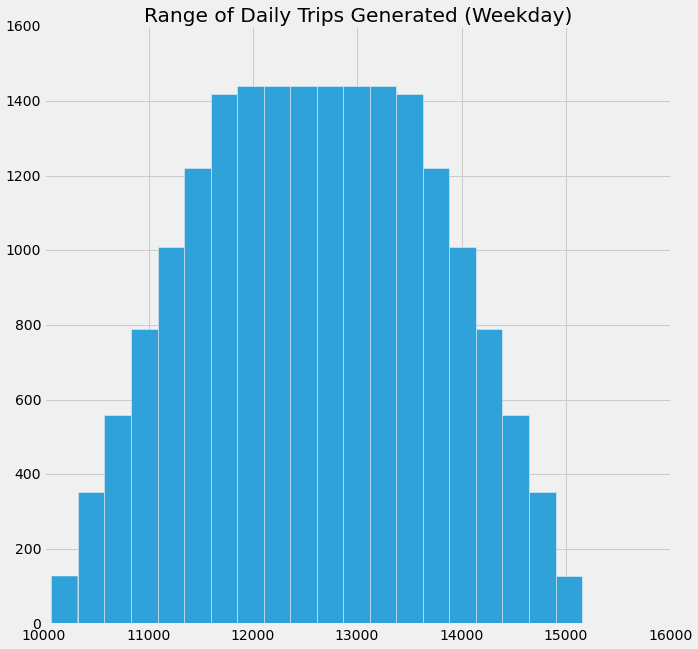

In [6]:
figure, ax = pl.subplots(figsize=(10,10))
pl.hist(np.array(generated).flatten(), 20)
ax.set_title('Range of Daily Trips Generated (Weekday)')

In [7]:
#figure, ax = pl.subplots(figsize=(10,10))
#pl.hist(np.array(gen_am).flatten(), 20)
#ax.set_title('Range of AM Peak Hour Trips (Weekday)')

In [8]:
#figure, ax = pl.subplots(figsize=(10,10))
#pl.hist(np.array(results['am']['auto']).flatten(), 20)
#ax.set_title('Range of AM Peak Hour Trips By Car (Weekday)')

In [9]:
#figure, ax = pl.subplots(figsize=(10,10))
#pl.hist(np.array(results['pm']['auto']).flatten(), 20)
#ax.set_title('Range of PM Peak Hour Trips By Car (Weekday)')

In [10]:
#figure, ax = pl.subplots(figsize=(10,10))
#pl.hist(np.array(results['mid']['auto']).flatten(), 20)
#ax.set_title('Range of Midday Peak Hour Trips By Car (Weekday)')

figure, ax = pl.subplots(figsize=(10,10))
pl.hist(np.array(results['pm']['subway']).flatten(), 20)
ax.set_title('Range of PM Peak Hour Trips By Subway (Weekday)')

In [11]:
np.mean(results['am']['subway'])

584.659536

In [12]:
np.std(results['am']['subway'])

56.225344991052559

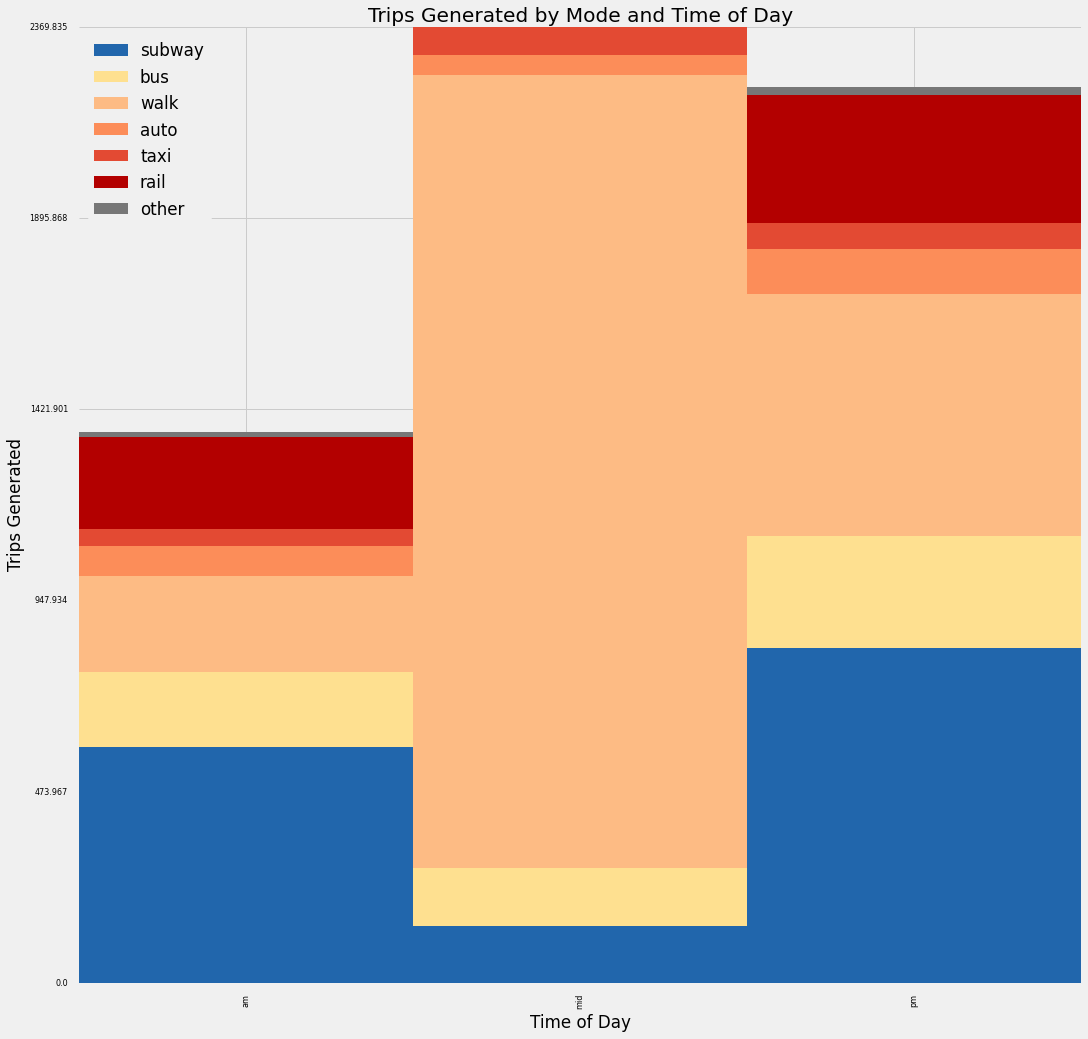

In [13]:
d_colors = ['#2166ac', '#fee090', '#fdbb84', '#fc8d59', '#e34a33', '#b30000', '#777777']
figure, ax = pl.subplots(figsize=(16,16))
d = []
#for mode in modes:
#    d.append([np.mean(results[time][mode]) for time in times])
for time in times:
    d.append([np.mean(results[time][mode]) for mode in modes])
bars = SBG.stackedBarPlot(ax, d, d_colors, xLabels=times)
ax.legend(bars, modes, loc='upper left')
ax.set_title('Trips Generated by Mode and Time of Day')
ax.set_ylabel('Trips Generated')
ax.set_xlabel('Time of Day')

In [14]:
for k in results:
    print k, np.mean(results[k]['subway'])

am 584.659536
mid 142.1901
pm 831.230706


In [15]:
for time in times:
    print time, np.sum([np.mean(results[time][mode]) for mode in modes])

am 1365.834
mid 2369.835
pm 2219.514
